In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import sys
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Bidirectional
from keras.layers.core import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import Imputer

In [2]:
#preparing column data
cols="""duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,
num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,
is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,
dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,
dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('label')

In [3]:
data = pd.read_csv('kddcup.data.corrected',names = columns)

In [4]:
attk = ['ftp_write.','guess_passwd.','imap.',
'multihop.','phf.','spy.','warezclient.','warezmaster.','buffer_overflow.',
'loadmodule.','perl.','rootkit.','ipsweep.','nmap.','portsweep.','satan.']

In [5]:
df = data[data['label'].isin(attk)]

In [6]:
data = data[0:100000]

In [7]:
data = pd.concat([data,df],axis=0)

### shape function gives the dimensions of the dataset

### View the first ten rows of the dataset

### View the Statistical Summary

### View the Label Distribution of Training and Test set



In [8]:
print(type(data))

print('Dimensions of the Data:',data.shape)

<class 'pandas.core.frame.DataFrame'>
Dimensions of the Data: (142280, 42)


In [9]:
data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,235,1337,0,0,0,0,...,6,1.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,234,1364,0,0,0,0,...,7,1.0,0.0,0.14,0.0,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,239,1295,0,0,0,0,...,8,1.0,0.0,0.12,0.0,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.


In [10]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,142280.000000,1.422800e+05,1.422800e+05,142280.0,142280.0,142280.000000,142280.000000,142280.000000,142280.000000,142280.000000,...,142280.000000,142280.000000,142280.000000,142280.000000,142280.000000,142280.000000,142280.000000,142280.000000,142280.000000,142280.000000
mean,177.397561,3.411209e+04,1.768790e+04,0.0,0.0,0.000035,0.083195,0.000443,0.540694,0.005053,...,155.559270,185.109776,0.786201,0.173921,0.367552,0.067905,0.021211,0.021638,0.159135,0.164090
std,2296.501208,5.516246e+06,3.783556e+06,0.0,0.0,0.007014,1.410018,0.025836,0.498343,0.790983,...,110.189755,107.306465,0.399891,0.360594,0.456743,0.185349,0.097865,0.144134,0.344244,0.369989
min,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,28.000000,64.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.300000e+02,3.130000e+02,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.330000e+02,1.692000e+03,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.040000,0.000000,0.000000,0.000000,0.000000
max,42908.000000,1.379964e+09,1.309937e+09,0.0,0.0,2.000000,30.000000,5.000000,1.000000,217.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
print('Label distribution Data :')
print(data['label'].value_counts())

Label distribution Data :
normal.             77888
smurf.              22093
satan.              15892
ipsweep.            12481
portsweep.          10413
nmap.                2316
warezclient.         1020
guess_passwd.          53
buffer_overflow.       32
warezmaster.           20
neptune.               15
imap.                  12
loadmodule.            10
rootkit.               10
ftp_write.              8
multihop.               7
phf.                    4
perl.                   4
spy.                    2
Name: label, dtype: int64



### Step 1: Data preprocessing:

#### One-Hot-Encoding (one-of-K) is used to to transform all categorical features into binary features. 

#### Requirement for One-Hot-encoding:

"The input to this transformer should be a matrix of integers, denoting the values taken on by categorical (discrete) features. The output will be a sparse matrix where each column corresponds to one possible value of one feature. It is assumed that input features take on values in the range [0, n_values)."
 
#Therefore the features first need to be transformed with LabelEncoder, to transform every category to a number.


### Identify categorical features

#columns that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).

### explore categorical features

In [12]:
print('Categorical Features in Data :')
for col_name in data.columns:
    if data[col_name].dtypes == 'object' :
        unique_cat = len(data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))



Categorical Features in Data :
Feature 'protocol_type' has 3 categories
Feature 'service' has 66 categories
Feature 'flag' has 11 categories
Feature 'label' has 19 categories


In [13]:
### see how distributed the feature service, protocol_type, flag is.
### Since it is evenly distributed and therefore we need to make dummies for all.


In [14]:
print()
print('Distribution of categories in service:')
print(data['service'].value_counts().sort_values(ascending=False).head(10))



Distribution of categories in service:
http        69524
ecr_i       22331
other       15187
eco_i       12640
private     12279
smtp         5821
domain_u     1237
ftp_data      799
ftp           620
finger        409
Name: service, dtype: int64


In [15]:
print('Distribution of categories in protocol_type:')
print(data['protocol_type'].value_counts().sort_values(ascending=False).head(10))

Distribution of categories in protocol_type:
tcp     103922
icmp     34975
udp       3383
Name: protocol_type, dtype: int64


In [16]:
print('Distribution of categories in flag:')
print(data['flag'].value_counts().sort_values(ascending=False).head(10))

Distribution of categories in flag:
SF        115729
REJ        15507
RSTR        7669
S0          1953
SH          1038
RSTO         145
RSTOS0       122
S1            55
OTH           45
S2            12
Name: flag, dtype: int64


### Need to make dummies for all categories as the distribution is fairly even. In total: 3+70+11=84 dummies.

### LabelEncoder

### Insert categorical features into a 2D numpy array


In [17]:
categorical_columns=['protocol_type', 'service', 'flag']

# Get the categorical values into a 2D numpy array
data_categorical_values = data[categorical_columns]

data_categorical_values.head()

,protocol_type,service,flag
0,tcp,http,SF
1,tcp,http,SF
2,tcp,http,SF
3,tcp,http,SF
4,tcp,http,SF


### Make column names for dummies

In [18]:
# protocol type
unique_protocol=sorted(data.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(data.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(data.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)


['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_remote_job', 'service_rje', 'servic

### Transform categorical features into numbers using LabelEncoder()


In [19]:
data_categorical_values_enc=data_categorical_values.apply(LabelEncoder().fit_transform)
print(data_categorical_values_enc.head())

   protocol_type  service  flag
0              1       24     9
1              1       24     9
2              1       24     9
3              1       24     9
4              1       24     9


### One-Hot-Encoding

In [20]:
enc = OneHotEncoder()
data_categorical_values_encenc = enc.fit_transform(data_categorical_values_enc)
data_cat_data = pd.DataFrame(data_categorical_values_encenc.toarray(),columns=dumcols)

data_cat_data.head()


C:\Users\soura\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Join encoded categorical dataframe with the non-categorical dataframe

In [65]:
newdata=data.join(data_cat_data)
newdata.drop('flag', axis=1, inplace=True)
newdata.drop('protocol_type', axis=1, inplace=True)
newdata.drop('service', axis=1, inplace=True)

In [66]:
newdata.shape

(142280, 119)

### We have now Obtained 119features -- Previous 42 Features + Current Encoded 80 Features - 3 features (flag, protocol, service)


### Split Dataset into 4 subsets for every attack category

### Replace labels column with new labels column
### Make new subsets

In [67]:
# renaming attack types
label_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
    }

In [68]:
newdata.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,215,45076,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,162,4528,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,236,1228,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,233,2032,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,239,486,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [69]:
impute = Imputer(strategy='most_frequent')

C:\Users\soura\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [71]:
newdata.label.value_counts()

normal.             77888
smurf.              22093
satan.              15892
ipsweep.            12481
portsweep.          10413
nmap.                2316
warezclient.         1020
guess_passwd.          53
buffer_overflow.       32
warezmaster.           20
neptune.               15
imap.                  12
loadmodule.            10
rootkit.               10
ftp_write.              8
multihop.               7
phf.                    4
perl.                   4
spy.                    2
Name: label, dtype: int64

In [72]:
#Replacing label types
newdata['label'] = newdata.label.apply(lambda r:label_types[r[:-1]])

In [73]:
newdata['label'].value_counts()

normal    77888
probe     41102
dos       22108
r2l        1126
u2r          56
Name: label, dtype: int64

In [74]:
l_enc = LabelEncoder()
labels = newdata['label']
newdata['label'] = l_enc.fit_transform(labels)

In [75]:
l_enc.classes_

array(['dos', 'normal', 'probe', 'r2l', 'u2r'], dtype=object)

In [76]:
to_drop_DoS = [2,3,4]
to_drop_Probe = [0,3,4]
to_drop_R2L = [0,2,4]
to_drop_U2R = [0,2,3]
DoS_df=newdata[~newdata['label'].isin(to_drop_DoS)];
Probe_df=newdata[~newdata['label'].isin(to_drop_Probe)];
R2L_df=newdata[~newdata['label'].isin(to_drop_R2L)];
U2R_df=newdata[~newdata['label'].isin(to_drop_U2R)];

print('DATA :')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)



DATA :
Dimensions of DoS: (99996, 119)
Dimensions of Probe: (118990, 119)
Dimensions of R2L: (79014, 119)
Dimensions of U2R: (77944, 119)


In [313]:
DoS_df['label'].value_counts()

1    77888
0    22108
Name: label, dtype: int64

In [314]:
Probe_df['label'].value_counts()

1    77888
2    41102
Name: label, dtype: int64

In [315]:
R2L_df['label'].value_counts()

1    77888
3     1126
Name: label, dtype: int64

In [316]:
U2R_df['label'].value_counts()

1    77888
4       56
Name: label, dtype: int64

In [79]:
X_DoS = DoS_df.drop('label',1)
X_DoS = impute.fit_transform(X_DoS)
Y_DoS = DoS_df.label

X_Probe = Probe_df.drop('label',1)
X_Probe = impute.fit_transform(X_Probe)
Y_Probe = Probe_df.label

X_R2L = R2L_df.drop('label',1)
X_R2L = impute.fit_transform(X_R2L)
Y_R2L = R2L_df.label

X_U2R = U2R_df.drop('label',1)
X_U2R = impute.fit_transform(X_U2R)
Y_U2R = U2R_df.label

### Use StandardScaler() to scale the dataframes


In [80]:
scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS) 
scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe) 
scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L) 
scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R) 

### Check that the Standard Deviation is 1

In [81]:

print(X_DoS.std(axis=0))

print(X_Probe.std(axis=0))
print(X_R2L.std(axis=0))
print(X_U2R.std(axis=0))

[1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0.]
[1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.]
[1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 

### Dimensionality Redution

In [82]:
pca_dos = PCA(n_components = 0.99)
X_DoS_reduced = pca_dos.fit_transform(X_DoS)
print(pca_dos.n_components_)
n = pca_dos.n_components_
print(pca_dos.explained_variance_*10)

37
[81.33786529 66.08062627 45.97822573 37.43019949 28.69591958 26.62648548
 22.53362239 21.63035518 18.52733435 16.28308053 14.73390953 14.02776372
 10.48484214 10.40568607 10.19958758 10.06856617 10.05292613 10.01136643
 10.00789554  9.84242424  9.00298933  8.85064644  8.02667988  7.69221691
  7.34182932  6.76516638  6.17567584  5.40654312  4.8921624   4.82250814
  4.49996252  3.64546308  3.28905563  2.62543347  2.56541532  2.29713487
  1.90420971]


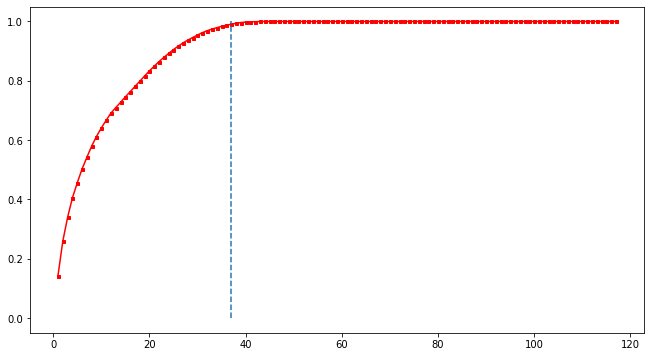

In [83]:
reg=[]
for n_components in range(1,X_DoS.shape[1]):
    
    pca = PCA(n_components = n_components)
    pca.fit(X_DoS)
    reg.append(np.sum(pca.explained_variance_ratio_))
 
x = [i for i in range(1,X_DoS.shape[1])] 
plt.figure(figsize=(11,6))
plt.plot(x,reg,'-s',color='r',markersize=3)

plt.plot([n,n],[0,1],'--')
plt.show()


In [85]:
pca_Probe = PCA(n_components = 0.99)
X_Probe_reduced = pca_Probe.fit_transform(X_Probe)
print(pca_Probe.n_components_)
n = pca_Probe.n_components_
print(pca_Probe.explained_variance_*10)

37
[96.49019488 33.9281207  33.32890002 31.34923483 28.07939352 26.87035114
 24.98847381 20.19035099 18.01022946 16.00621316 14.61792277 13.22898936
 12.21428625 10.7016587  10.22998055 10.11252511 10.05441663 10.00973052
 10.0073141  10.00279813 10.00071362 10.00062757 10.00036639  9.94396403
  8.92518098  8.64612529  8.32028645  7.75147493  7.49887054  6.51130965
  5.38213191  5.09728343  4.6610444   4.06052282  2.67937415  2.5380879
  2.10957934]


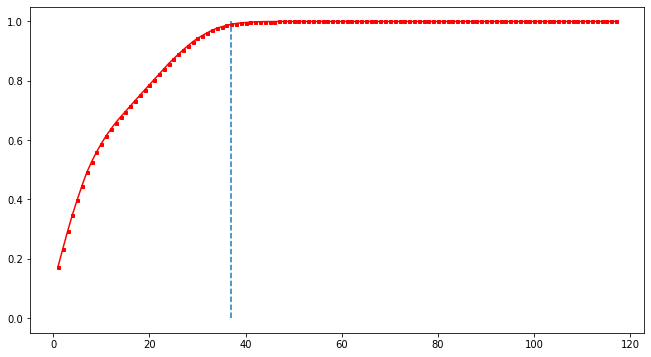

In [86]:
reg=[]
for n_components in range(1,X_Probe.shape[1]):
    
    pca = PCA(n_components = n_components)
    pca.fit(X_Probe)
    reg.append(np.sum(pca.explained_variance_ratio_))

x = [i for i in range(1,X_DoS.shape[1])] 
plt.figure(figsize=(11,6))
plt.plot(x,reg,'-s',color='r',markersize=3)

plt.plot([n,n],[0,1],'--')
plt.show()


In [87]:
pca_R2L = PCA(n_components = 0.99)
X_R2L_reduced = pca_R2L.fit_transform(X_R2L)
print(pca_R2L.n_components_)
n= pca_R2L.n_components_
print(pca_R2L.explained_variance_*10)

40
[62.70655383 50.02780644 39.15043797 31.77835641 25.01892108 24.5122167
 23.39363718 20.43351547 19.97891931 17.66641917 15.40817114 14.47908931
 11.90434022 11.49203236 11.04261791 10.45339593 10.2522112  10.09612192
 10.04665972 10.0240472  10.00494178  9.98465344  9.49731325  9.22756369
  8.80977366  8.25974536  7.88097941  7.36187481  7.10025993  6.45634797
  5.83831289  5.62814509  5.41092199  5.21778274  4.14916493  3.69422503
  3.57571622  2.91769356  2.49193213  1.71030741]


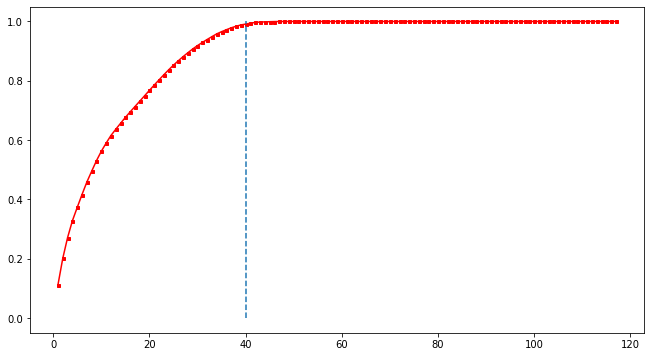

In [88]:
reg=[]
for n_components in range(1,X_R2L.shape[1]):
    
    pca = PCA(n_components = n_components)
    pca.fit(X_R2L)
    reg.append(np.sum(pca.explained_variance_ratio_))
 
x = [i for i in range(1,X_DoS.shape[1])] 
plt.figure(figsize=(11,6))
plt.plot(x,reg,'-s',color='r',markersize=3)

plt.plot([n,n],[0,1],'--')
plt.show()


In [89]:
pca_U2R = PCA(n_components = 0.99)
X_U2R_reduced = pca_U2R.fit_transform(X_U2R)
print(pca_U2R.n_components_)
n= pca_U2R.n_components_
print(pca_U2R.explained_variance_*10)

39
[67.21067462 52.43224588 40.13297999 33.17153337 27.06314048 23.89554628
 23.5710537  22.68070376 20.94221531 18.95585285 15.1896529  14.01845171
 11.42569987 10.77575061 10.69228553 10.17445374 10.04979334 10.02372127
 10.02110677  9.95189101  9.64918841  9.27195098  8.80147459  8.65364592
  8.47820519  8.11673962  7.18457019  6.62348952  6.34584804  6.12698351
  5.48860348  5.25816608  4.98751965  4.51089044  3.85871687  2.63038892
  2.57539504  2.24605566  1.86055266]


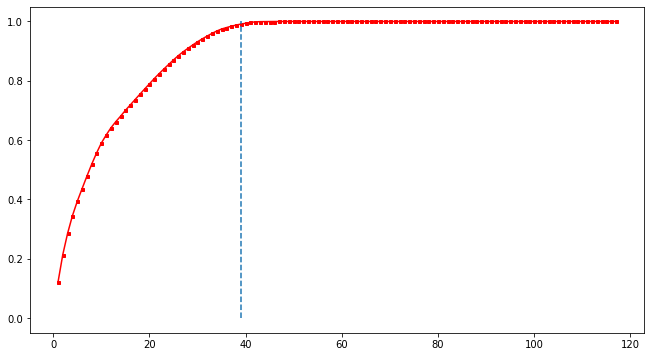

In [90]:
reg=[]
for n_components in range(1,X_U2R.shape[1]):

    pca = PCA(n_components = n_components)
    pca.fit(X_U2R)
    reg.append(np.sum(pca.explained_variance_ratio_))
 
x = [i for i in range(1,X_DoS.shape[1])] 
plt.figure(figsize=(11,6))
plt.plot(x,reg,'-s',color='r',markersize=3)

plt.plot([n,n],[0,1],'--')
plt.show()


### Building model  1.CNN model 2.LSTM  3.CONV-LSTM 

In [331]:
n_steps= 1
n_outputs = 2
epochs= 15
verbose = 1 
batch_size = 4

In [334]:
x = [i for i in range(1,epochs+1)]

In [232]:
def plot_accuracy(x,history_cnn,history_lstm,history_conv):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.title("Accuracy comparison")
    plt.plot(x,history_cnn.history['acc'],label='CNN')
    plt.plot(x,history_lstm.history['acc'],label='LSTM')
    plt.plot(x,history_conv.history['acc'],label='CONV-LSTM')
    plt.legend()
    plt.subplot(122)
    plt.title("Val_Accuracy comparison")
    plt.plot(x,history_cnn.history['val_acc'],label='CNN')
    plt.plot(x,history_lstm.history['val_acc'],label='RNN')
    plt.plot(x,history_conv.history['val_acc'],label='CONV-LSTM')
    plt.legend()
    plt.show()

In [233]:
def plot_loss(x,history_cnn,history_lstm,history_conv):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.title("LOSS comparison")
    plt.plot(x,history_cnn.history['loss'],label='CNN')
    plt.plot(x,history_lstm.history['loss'],label='RNN')
    plt.plot(x,history_conv.history['loss'],label='CONV-LSTM')
    plt.legend()
    plt.subplot(122)
    plt.title("VAL_LOSS comparison")
    plt.plot(x,history_cnn.history['val_loss'],label='CNN')
    plt.plot(x,history_lstm.history['val_loss'],label='RNN')
    plt.plot(x,history_conv.history['val_loss'],label='CONV-LSTM')
    plt.legend()
    plt.show()

In [234]:
def plot_precision(x,history_cnn,history_lstm,history_conv):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.title("PRECISION comparison")
    plt.plot(x,history_cnn.history['precision'],label='CNN')
    plt.plot(x,history_lstm.history['precision'],label='RNN')
    plt.plot(x,history_conv.history['precision'],label='CONV-LSTM')
    plt.legend()
    plt.subplot(122)
    plt.title("VAL_PRECISION comparison")
    plt.plot(x,history_cnn.history['val_precision'],label='CNN')
    plt.plot(x,history_lstm.history['val_precision'],label='RNN')
    plt.plot(x,history_conv.history['val_precision'],label='CONV-LSTM')
    plt.legend()
    plt.show()

In [235]:
def plot_f1score(x,history_cnn,history_lstm,history_conv):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.title("F1_SCORE comparison")
    plt.plot(x,history_cnn.history['f1_score'],label='CNN')
    plt.plot(x,history_lstm.history['f1_score'],label='RNN')
    plt.plot(x,history_conv.history['f1_score'],label='CONV-LSTM')
    plt.legend()
    plt.subplot(122)
    plt.title("VAL_F1_SCORE comparison")
    plt.plot(x,history_cnn.history['val_f1_score'],label='CNN')
    plt.plot(x,history_lstm.history['val_f1_score'],label='RNN')
    plt.plot(x,history_conv.history['val_f1_score'],label='CONV-LSTM')
    plt.legend()
    plt.show()

In [236]:
def plot_recall(x,history_cnn,history_lstm,history_conv):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.title("RECALL comparison")
    plt.plot(x,history_cnn.history['recall'],label='CNN')
    plt.plot(x,history_lstm.history['recall'],label='RNN')
    plt.plot(x,history_conv.history['recall'],label='CONV-LSTM')
    plt.legend()
    plt.subplot(122)
    plt.title("VAL_RECALL comparison")
    plt.plot(x,history_cnn.history['val_recall'],label='CNN')
    plt.plot(x,history_lstm.history['val_recall'],label='RNN')
    plt.plot(x,history_conv.history['val_recall'],label='CONV-LSTM')
    plt.legend()
    plt.show()

In [237]:
# Wrapper for turning tensorflow metrics into keras metrics 

def as_keras_metric(method):
    import functools
    from keras import backend as K
    @functools.wraps(method)
    def wrapper(self, args, **kwargs):
        value, update_op = method(self, args, **kwargs)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([update_op]):
            value = tf.identity(value)
        return value
    return wrapper

# defining precision ,recall abd f_score
precision = as_keras_metric(tf.metrics.precision)
recall = as_keras_metric(tf.metrics.recall)
f1_score=as_keras_metric(tf.contrib.metrics.f1_score)

In [238]:
# CNN modle
# define model
def CNNmodel(n_steps,n_features,n_outputs):
  model = Sequential(name = 'CNN')
  model.add(Conv1D(filters=12, kernel_size=1, activation='relu', input_shape=(n_steps, n_features)))
  model.add(Flatten())
  model.add(Dense(10,activation='relu'))
  model.add(Dense(n_outputs,activation='softmax'))
  opt = Adam(lr = 0.1)
  model.compile(loss="binary_crossentropy", optimizer=opt,metrics=['accuracy',precision,recall,f1_score])
  print(model.summary())
  return model
# fit model
#history_cnn = model.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

In [239]:
#LSTM model
# define model
def LSTMmodel(n_steps,n_features,n_outputs):
    model = Sequential(name='LSTM')
    model.add(LSTM(12, activation='relu', return_sequences=True,input_shape=( n_steps, n_features)))
    model.add(Bidirectional(LSTM(8, activation='relu')))
    model.add(Dense(n_outputs,activation='sigmoid'))
    opt = Adam(lr = 0.1)
    model.compile(loss="binary_crossentropy", optimizer=opt,metrics=['accuracy',precision,recall,f1_score])
    print(model.summary())
    return model


In [240]:
#Conv-lstm
# define model
def CONVlstm(n_steps,n_features,n_outputs):
    model = Sequential(name='CONVLSTM')
    model.add(TimeDistributed(Conv1D(filters=12, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
    model.add(TimeDistributed(Dropout(0.5)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(24, activation='relu', return_sequences=True,input_shape=( n_steps, n_features)))
    model.add(Bidirectional(LSTM(12, activation='relu')))
    model.add(Dense(n_outputs,activation='sigmoid'))
    opt = Adam(lr = 0.001)
    model.compile(loss="binary_crossentropy", optimizer=opt,metrics=['accuracy',precision,recall,f1_score])
    print(model.summary())
    return model

In [69]:

n_features = X_DoS_reduced.shape[1]

oe_enc = OneHotEncoder()
Y_DoS = oe_enc.fit_transform(np.array(Y_DoS).reshape(-1,1))
X_train,X_test,Y_train,Y_test = train_test_split(X_DoS_reduced,Y_DoS.toarray(),stratify=Y_DoS.toarray())
X_train = X_train.reshape((X_train.shape[0],  n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0] , n_steps, n_features))

CNNclassifier =CNNmodel(n_steps, n_features,n_outputs)
history_cnn = CNNclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

LSTMclassifier =LSTMmodel(n_steps, n_features,n_outputs)
history_LSTM = LSTMclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

X_train = np.array(X_train).reshape((X_train.shape[0], 1, n_steps, n_features))
X_test = np.array(X_test).reshape((X_test.shape[0] ,1, n_steps, n_features))
CONVlstmclassifier = CONVlstm(n_steps,n_features,n_outputs)
history_CONVlstm = CONVlstmclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 1, 12)             456       
_________________________________________________________________
flatten_2 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________
None
Train on 74997 samples, validate on 24999 samples
Epoch 1/15
74997/74997 [==============================] - 108s 1ms/step - loss: 2.6851 - acc: 0.8324 - precision: 0.8911 - recall: 0.9080 - f1_score: 0.9065 - val_loss: 3.5441 - val_acc: 0.7789 - val_precisio

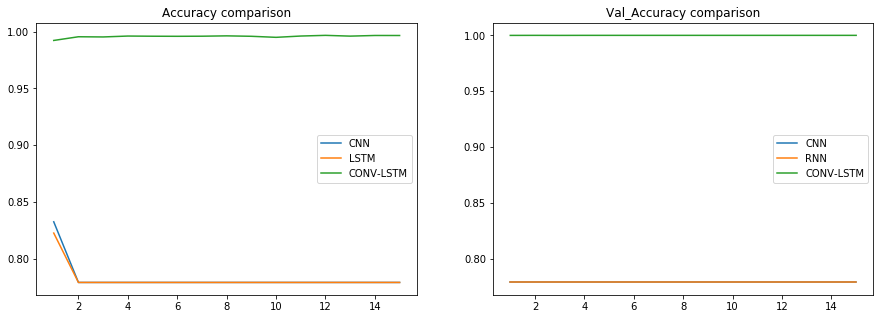

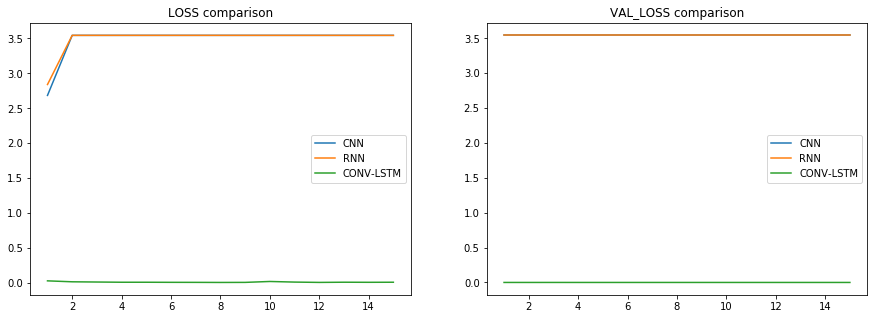

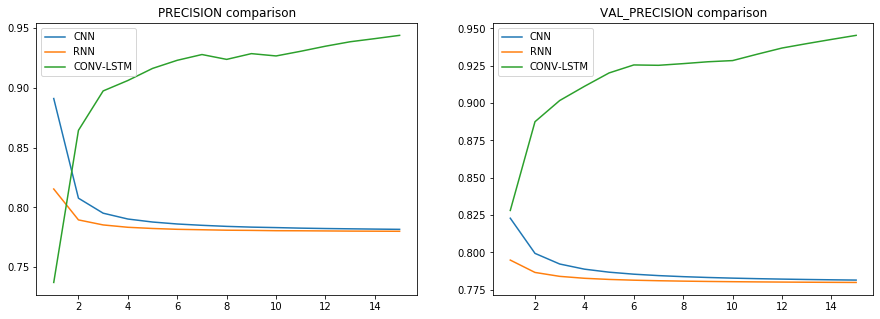

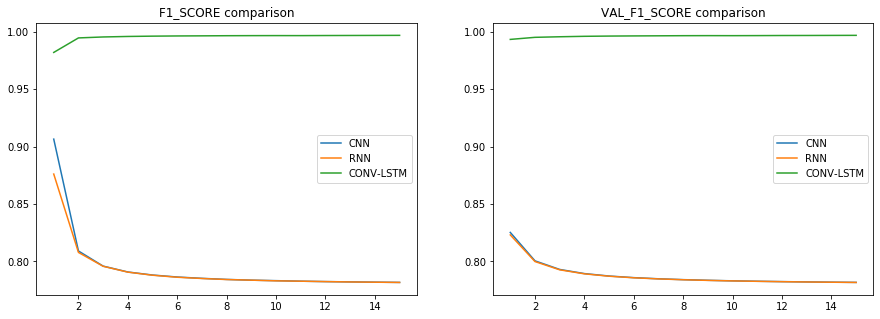

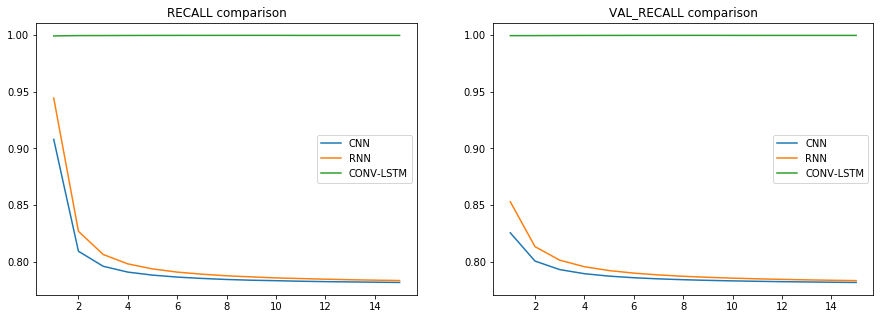

In [73]:
plot_accuracy(x,history_cnn,history_LSTM,history_CONVlstm)
plot_loss(x,history_cnn,history_LSTM,history_CONVlstm)
plot_precision(x,history_cnn,history_LSTM,history_CONVlstm)
plot_f1score(x,history_cnn,history_LSTM,history_CONVlstm)
plot_recall(x,history_cnn,history_LSTM,history_CONVlstm)

In [82]:

n_features = X_Probe_reduced.shape[1]

oe_enc = OneHotEncoder()
Y_Probe = oe_enc.fit_transform(np.array(Y_Probe).reshape(-1,1))
X_train,X_test,Y_train,Y_test = train_test_split(X_Probe_reduced,Y_Probe.toarray(),stratify=Y_Probe.toarray())
X_train = X_train.reshape((X_train.shape[0],  n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0] , n_steps, n_features))

CNNclassifier =CNNmodel(n_steps, n_features,n_outputs)
history_cnn = CNNclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

LSTMclassifier =LSTMmodel(n_steps, n_features,n_outputs)
history_LSTM = LSTMclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

X_train = np.array(X_train).reshape((X_train.shape[0], 1, n_steps, n_features))
X_test = np.array(X_test).reshape((X_test.shape[0] ,1, n_steps, n_features))
CONVlstmclassifier = CONVlstm(n_steps,n_features,n_outputs)
history_CONVlstm = CONVlstmclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 1, 12)             480       
_________________________________________________________________
flatten_5 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 22        
Total params: 632
Trainable params: 632
Non-trainable params: 0
_________________________________________________________________
None
Train on 58419 samples, validate on 19473 samples
Epoch 1/15
58419/58419 [==============================] - 97s 2ms/step - loss: 8.8756e-04 - acc: 0.9999 - precision: 0.6607 - recall: 0.9999 - f1_score: 0.9997 - val_loss: 8.2331e-04 - val_acc: 0.9999 - val_p

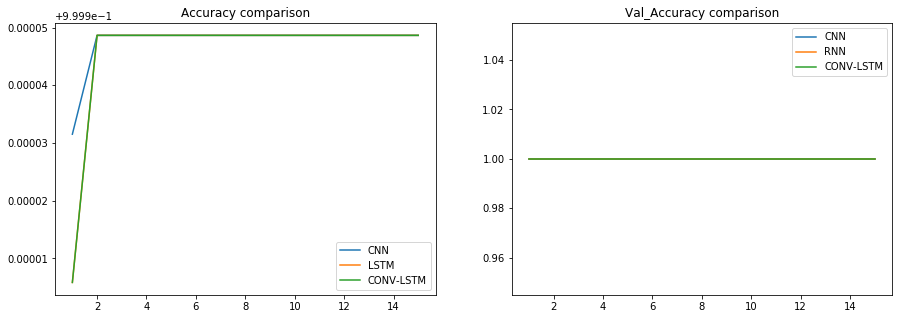

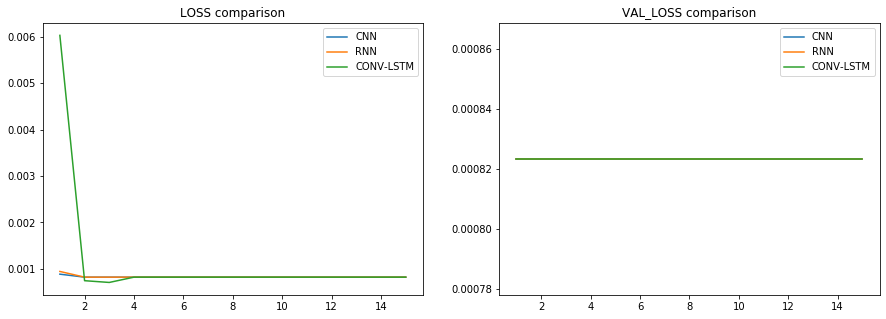

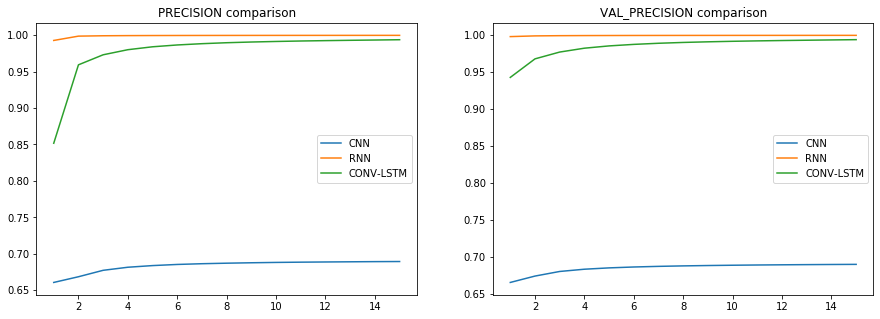

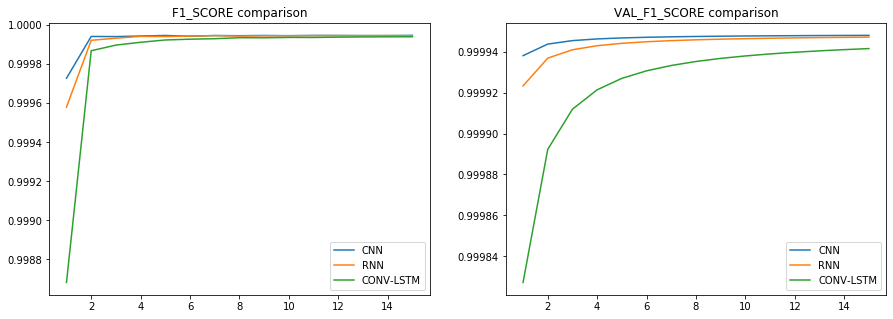

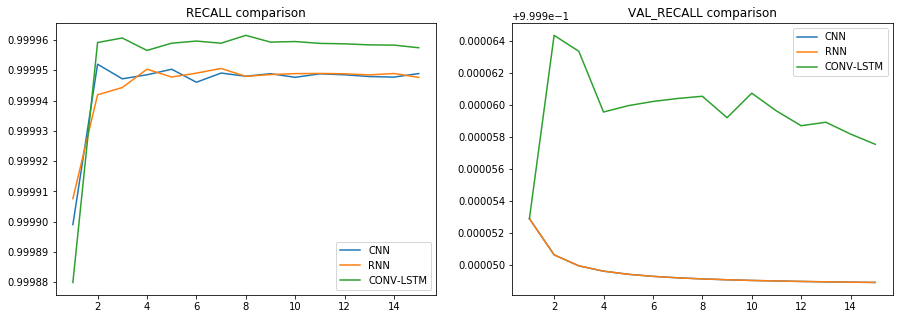

In [83]:
plot_accuracy(x,history_cnn,history_LSTM,history_CONVlstm)
plot_loss(x,history_cnn,history_LSTM,history_CONVlstm)
plot_precision(x,history_cnn,history_LSTM,history_CONVlstm)
plot_f1score(x,history_cnn,history_LSTM,history_CONVlstm)
plot_recall(x,history_cnn,history_LSTM,history_CONVlstm)

In [241]:

n_features = X_R2L_reduced.shape[1]

oe_enc = OneHotEncoder()
Y_R2L = oe_enc.fit_transform(np.array(Y_R2L).reshape(-1,1))
X_train,X_test,Y_train,Y_test = train_test_split(X_R2L_reduced,Y_R2L.toarray(),stratify=Y_R2L.toarray())
X_train = X_train.reshape((X_train.shape[0],  n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0] , n_steps, n_features))

CNNclassifier =CNNmodel(n_steps, n_features,n_outputs)
history_cnn = CNNclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

LSTMclassifier =LSTMmodel(n_steps, n_features,n_outputs)
history_LSTM = LSTMclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

X_train = np.array(X_train).reshape((X_train.shape[0], 1, n_steps, n_features))
X_test = np.array(X_test).reshape((X_test.shape[0] ,1, n_steps, n_features))
CONVlstmclassifier = CONVlstm(n_steps,n_features,n_outputs)
history_CONVlstm = CONVlstmclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)




C:\Users\soura\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 1, 12)             336       
_________________________________________________________________
flatten_2 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
Total params: 488
Trainable params: 488
Non-trainable params: 0
_________________________________________________________________
None
Train on 58458 samples, validate on 19486 samples
Epoch 1/15
58458/58458 [==============================] - 87s 1ms/step - loss: 0.0116 - acc: 0.9992 - precision: 0.8129 - recall: 0.9993 - f1_score: 0.9989 - val_loss: 0.0115 - val_acc: 0.9993 - val_precision

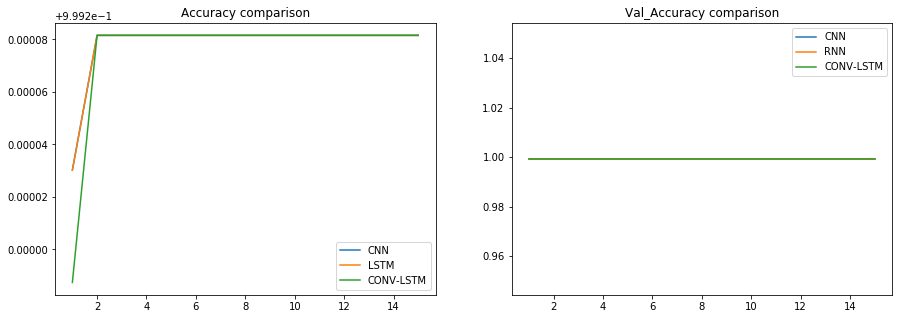

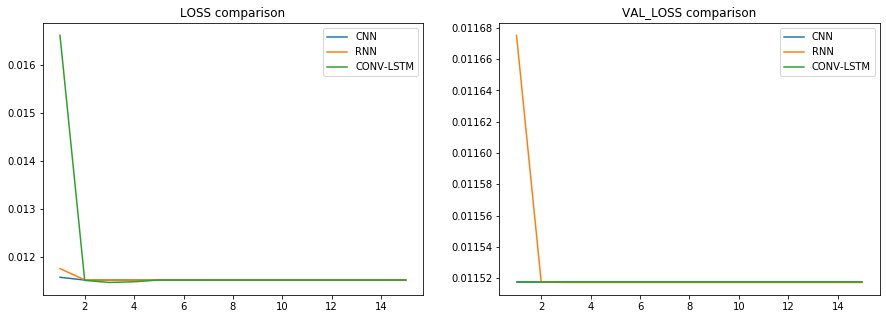

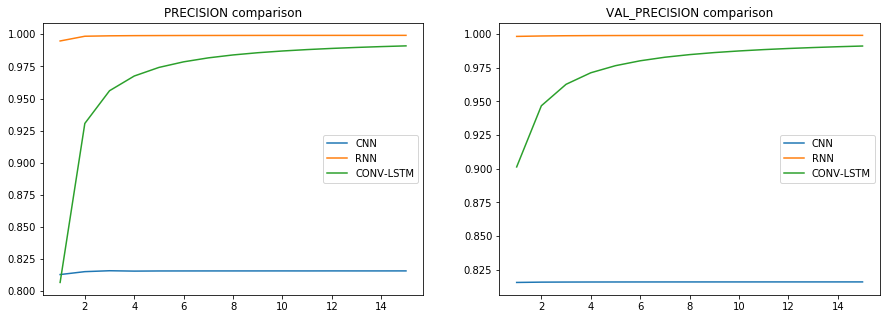

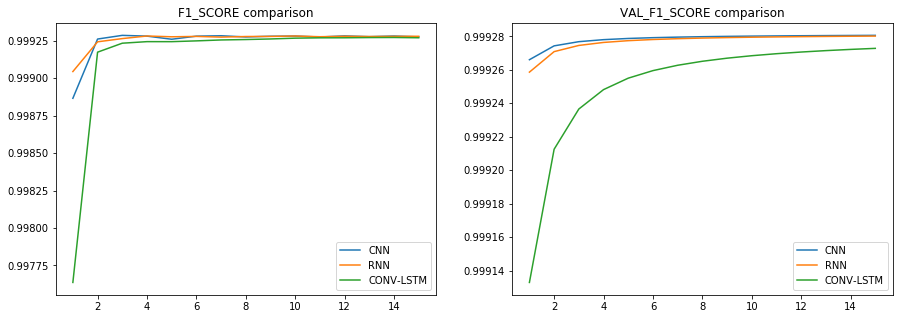

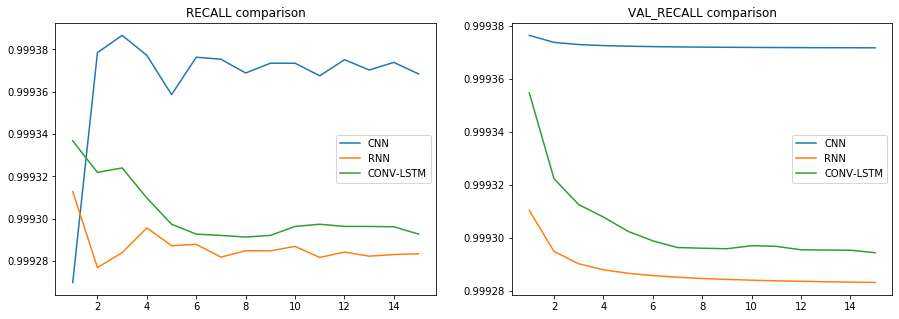

In [242]:
plot_accuracy(x,history_cnn,history_LSTM,history_CONVlstm)
plot_loss(x,history_cnn,history_LSTM,history_CONVlstm)
plot_precision(x,history_cnn,history_LSTM,history_CONVlstm)
plot_f1score(x,history_cnn,history_LSTM,history_CONVlstm)
plot_recall(x,history_cnn,history_LSTM,history_CONVlstm)

In [332]:

n_features = X_U2R_reduced.shape[1]

oe_enc = OneHotEncoder()
Y_U2R = oe_enc.fit_transform(np.array(Y_U2R).reshape(-1,1))
X_train,X_test,Y_train,Y_test = train_test_split(X_U2R_reduced,Y_U2R.toarray(),stratify=Y_U2R.toarray())
X_train = X_train.reshape((X_train.shape[0],  n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0] , n_steps, n_features))

CNNclassifier =CNNmodel(n_steps, n_features,n_outputs)
history_cnn = CNNclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

LSTMclassifier =LSTMmodel(n_steps, n_features,n_outputs)
history_LSTM = LSTMclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

X_train = np.array(X_train).reshape((X_train.shape[0], 1, n_steps, n_features))
X_test = np.array(X_test).reshape((X_test.shape[0] ,1, n_steps, n_features))
CONVlstmclassifier = CONVlstm(n_steps,n_features,n_outputs)
history_CONVlstm = CONVlstmclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

C:\Users\soura\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 1, 12)             336       
_________________________________________________________________
flatten_5 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 22        
Total params: 488
Trainable params: 488
Non-trainable params: 0
_________________________________________________________________
None
Train on 58458 samples, validate on 19486 samples
Epoch 1/15
58458/58458 [==============================] - 89s 2ms/step - loss: 0.0116 - acc: 0.9992 - precision: 0.8978 - recall: 0.9993 - f1_score: 0.9990 - val_loss: 0.0115 - val_acc: 0.9993 - val_precision

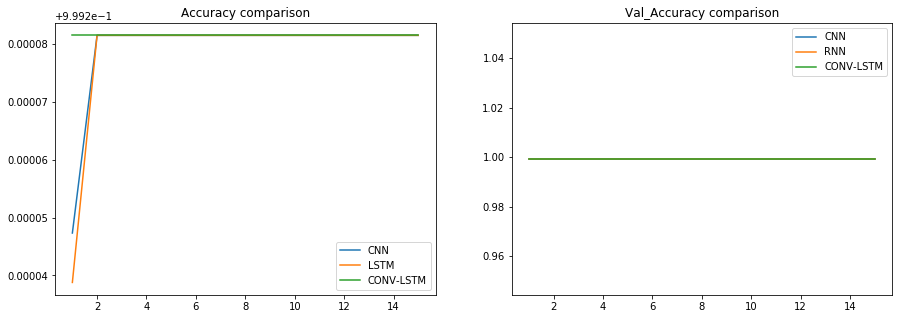

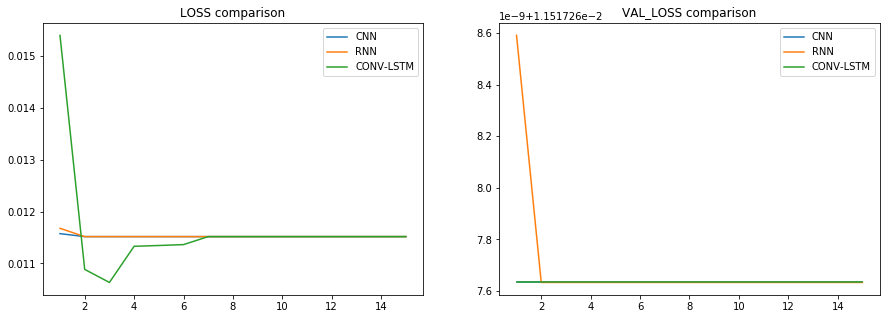

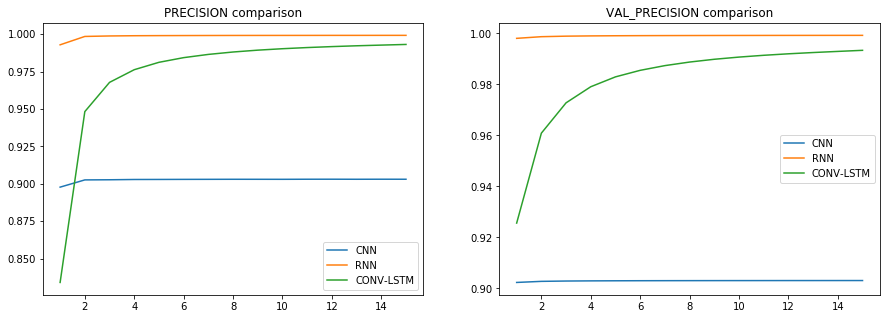

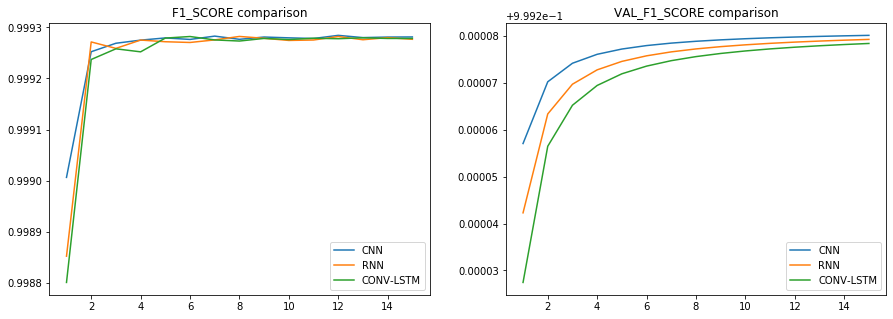

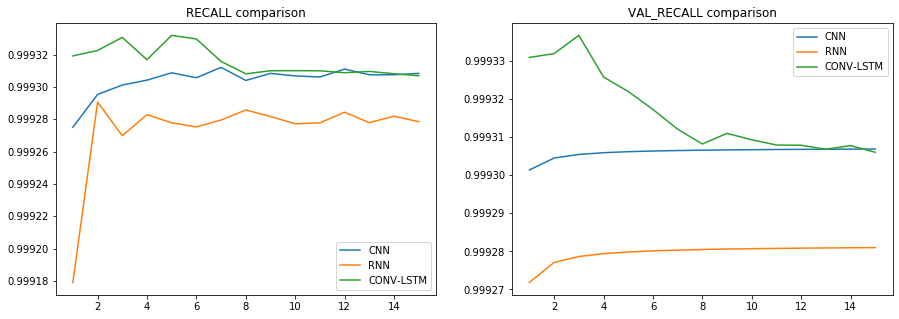

In [335]:
plot_accuracy(x,history_cnn,history_LSTM,history_CONVlstm)
plot_loss(x,history_cnn,history_LSTM,history_CONVlstm)
plot_precision(x,history_cnn,history_LSTM,history_CONVlstm)
plot_f1score(x,history_cnn,history_LSTM,history_CONVlstm)
plot_recall(x,history_cnn,history_LSTM,history_CONVlstm)